<a href="https://colab.research.google.com/github/LimGuenTaek/pymldg-rev/blob/main/04_%EB%B6%84%EB%A5%98/4_1_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류의 개요

지도 학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상황에서 학습하는 머신러닝 방식입니다.

지도학습의 대표적인 유형인 분류(Classification)은 학습 데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고 , 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것 입니다.

즉 , 기존 데이터가 어떤 레이블에 속하는 지 패턴을 알고리즘으로 인지한뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것 입니다.

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있습니다.

* 베이즈(Bayes)통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)

* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)

* 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)

* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)

* 근접 거리를 기준으로 하는 최소 근접 알고리즘(Nearest Neighbor)

* 심층 연결 기반의 신경망(Neural Network)

* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

4장에서는 다양한 알고리즘 중에서 앙상블 방법을 집중적으로 다룹니다.

앙상블은 분류에서 가장 각광을 받는 방법 중 하나 입니다. 물론 이미지 , 영상 , 음성 , NLP 영역에서는 신경망에 기반한 딥러닝이 머신러닝계를 선도하고 있지만 이를 제외한 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능으로 인해 앙상블 방법이 많은 분석가와 데이터 과학자들에게 애용되고 있습니다.

이 장에서는 앙상을 방법의 개요와 랜덤 포레스트 , 그래디언트 부스팅의 전통적인 앙상블 기법뿐만 아니라 부스팅 계열의 최신 기법인 XGBoost , LightGBM , 그리고 앙상블의 앙상블이라는 스태킹(Stacking) 기법에 대해서도 상세히 알아보겠습니다.

우선 앙상블을 학습하기전에 앙상블의 기본 알고리즘으로 사용되는 결정 트리에 대해서 알아보고 가겠습니다.

# 결정 트리

결정 트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘 입니다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것입니다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데 , 쉽게 생각하면 스무고개 게임과 유사하며 룰 기반의 프로그램에 적용되는 if , else를 자동으로 찾아내 예측을 위한 규칙을 만드는 알고리즘으로 이해 하면 됩니다.


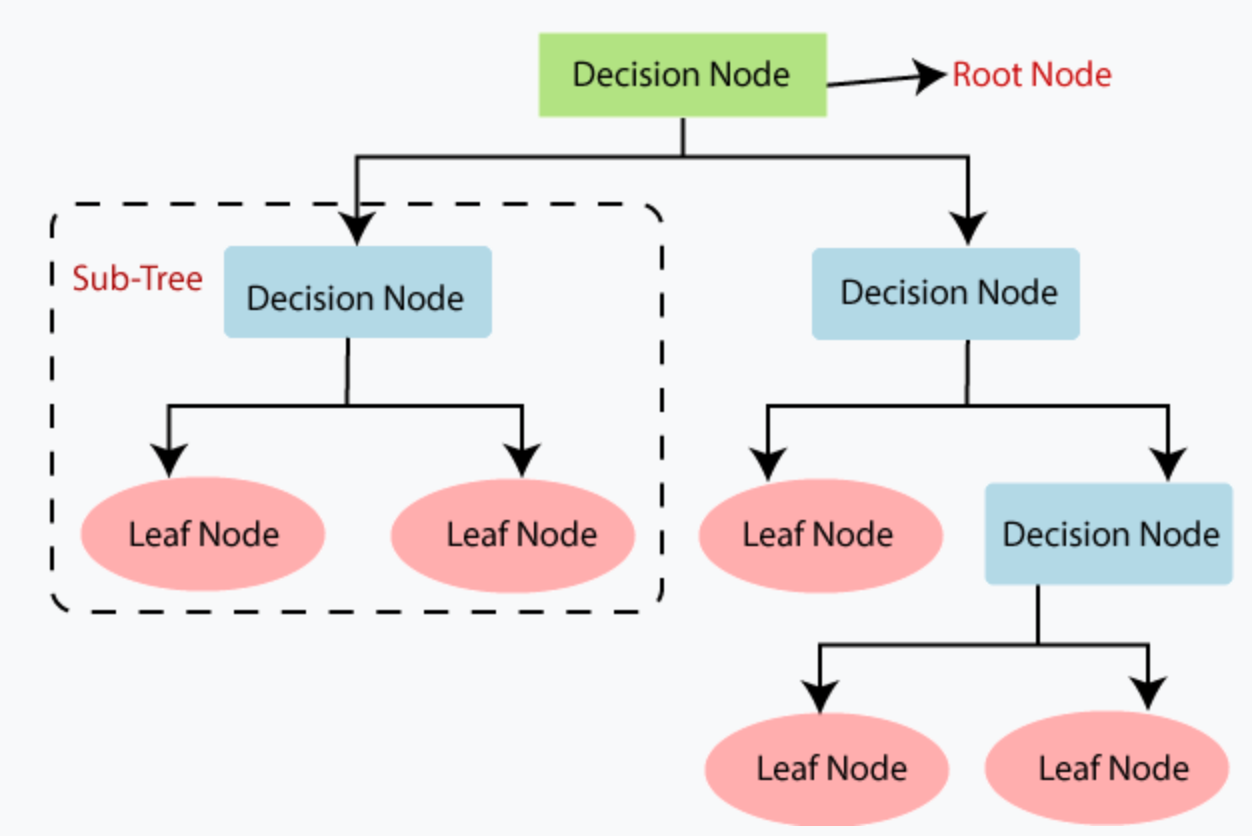

위의 그림은 결정 트리의 구조를 간략하게 나타낸 것입니다.

결정노드(규칙노드)로 표시된 노드는 규칙 조건이 되는 것이고 리프 노드(Leaf Node)로 표시된 노드는 결정된 클래스 값입니다.

새로운 규칙 조건 마다 서브 트리가 생성됩니다. 많은 규칙이 있다는 것은 곧 분류의 결정하는 방식이 더욱 복잡해진다는 얘기이고 , 이는 곧 과적합으로 이어지기 쉽습니다. 즉 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높습니다.

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야합니다.

이를 위해서는 어떻게 트리를 분할(Split)할 것인가가 중요한데 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요합니다.

다음 그림에서 가장 균일한 데이터 세트부터 순서대로 나열한다면 어떻게 될까요??


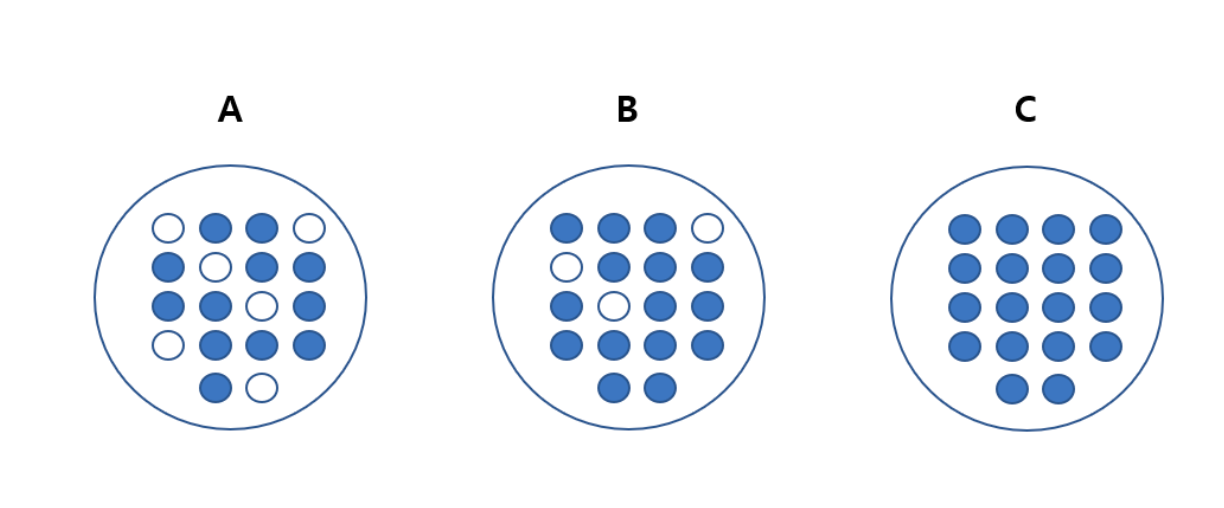

C의 경우 모두 검은 공으로 구성되므로 C의 균일도가 가장 높고 , 그 다음은 B , 그 다음이 A입니다.

이러한 데이터 세트의 균일도는 데이터를 구부하는 데 필요한 정보의 양에 영향을 미칩니다. 가령 눈을 가린 채 데이터 세트 C에서 하나의 데이터를 뽑았을 때 데이터에 대한 별다른 정보 없이도 검은공이라 예측할 수 있습니다. 하지만 A의 경우 상대적으로 혼잡도가 높고 균일도가 낮기 때문에 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요합니다.

이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있습니다.

* **정보 이득**은 엔트로피라는 개념을 기반으로 합니다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는 데 , 서로 다른 값이 섞여 있으면 엔트로피가 높고 , 같은 값이 섞여 있으면 엔트로피가 낮습니다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값입니다. 즉 1-엔트로피 지수입니다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정합니다. 정보 이득이 크게 되는 방향으로 분할합니다.

* **지니 계수**는 원래 경제학에서 불평등 지수를 나타낼 때 사용되는 계수입니다. 0이 가장 평등하고 1로 갈수록 불평등합니다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할합니다.

## 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점입니다. 결정 트리가 룰이 매우 명확하고 , 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어 지는지 알 수 있고 , 시각화로 표현까지 할 수 있습니다. 또한 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없습니다.

반면에 결정 트리 모델의 가장 큰 단점은 과적합으로 정확도가 떨어진다는 점입니다. 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리르 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해질 수밖에 없습니다.

## 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공합니다.

사이킷런의 결정 트리 구현은 CART 알고리즘 기반입니다.

* **min_samples_split** : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용

* **min_samples_leaf** : 말단 노드(Leaf Node)가 되기 위한 최소한의 샘플 데이터 수

* **max_features** : 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None 으로 데이터 세트의 모든 피처를 사용해 분할 수행

* **max_depth** : 트리의 최대 깊이를 규정 디폴트는 None이라 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_sample_split 보다 작아질 때 까지 계속 깊이를 

* **max_leaf_nodes** : 말단 노드의 최대 갯수

붓꽃 데이터 세트를 이용해 결정트리 실습을 간단하게 진행해보겠습니다.

결정트리를 matplotlib 과 tree.plot_tree를 이용해서 plot 해볼 수 있는데

X[0] , X[1] , X[2] , X[3](sepal length , sepal width , petal length , petal width) 등 Feature를 사용하여 규칙을 만들고 있음을 확인할 수 있습니다.



accuracy : 0.9333333333333333


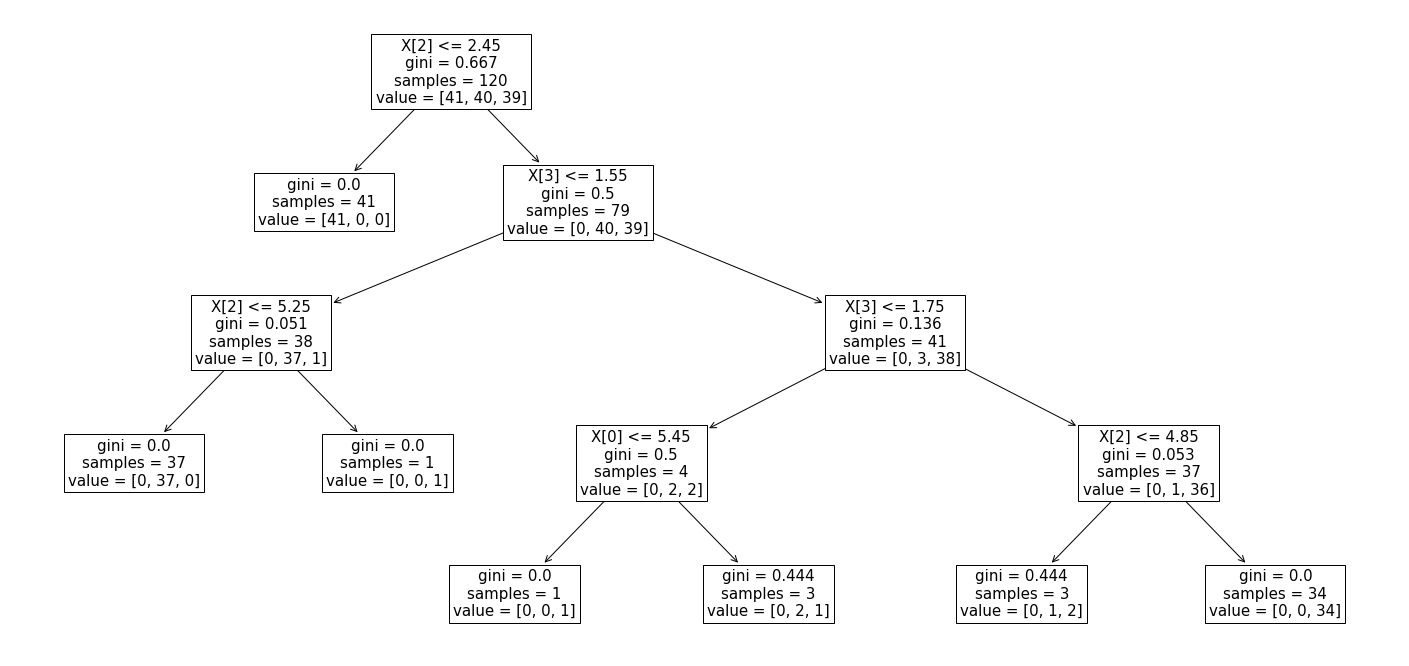

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156,min_samples_split=4)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)
predict=dt_clf.predict(X_test)
print("accuracy : {}".format(np.mean(predict==y_test)))

from sklearn import tree 
import matplotlib.pyplot as plt
#tree.plot_tree(dtc.fit(X_train,y_train))
fig, ax = plt.subplots(figsize=(25, 12))
tree.plot_tree(dt_clf.fit(X_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건입니다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며 , 모델을 좀 더 간결하고 이상치(Outlier)에 강인한 모델을 만들 수 있기 때문입니다.

사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_**속성으로 제공합니다.

sepal length (cm) : 0.009
sepal width (cm) : 0.000
petal length (cm) : 0.557
petal width (cm) : 0.435


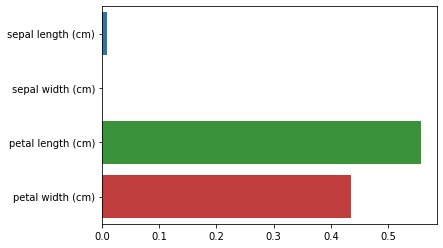

In [ ]:
import seaborn as sns

import seaborn as sns
import numpy as np
%matplotlib inline

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

여러 피처들 중 petal_length가 가장 피처 중요도가 높음을 알 수 있습니다.

일반적으로 다른 알고리즘이 블랙박스라고 불리듯이 알고리즘 내부의 동작 원리가 복잡한 데 반해 결정 트리는 알고리즘 자체가 직관적이기 때문에 알고리즘과 관련된 요소를 시각적으로 표현할 수 있는 다양한 방안이 있습니다.

## 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보겠습니다. 먼저 분류를 위한 데이터 세트르 임의로 만들어 보겠습니다. 사이킷런은 분류를 위한 테스트용 데이터를 쉽게 만들수 있도록 make_classification() 함수를 제공합니다.

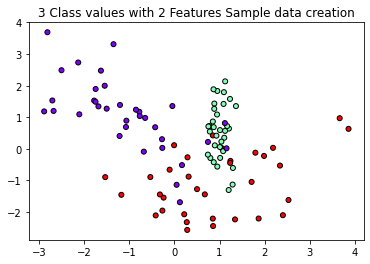

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

Decision Tree의 파라미터를 디폴트로 두고 결정경계를 시각화 해보면 이상치에 민감하게 반응하는 것을 확인할 수 있습니다.

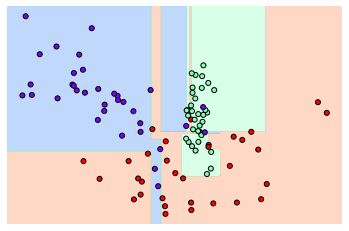

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

min_sample_leaf=6으로 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 뒤 결정 기준 경계가 어떻게 변하는 지 살펴보겠습니다.

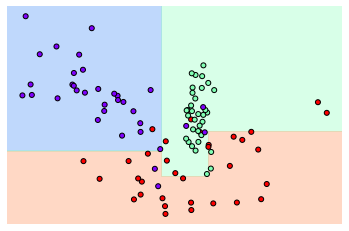

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 알 수 있습니다.